# Détection de la position d'un usager

In [1]:
from src.plot import openImage
import matplotlib.pyplot as plt

In [2]:
ECHELLE = 100
image_batiment = openImage("./images/batiment.png")

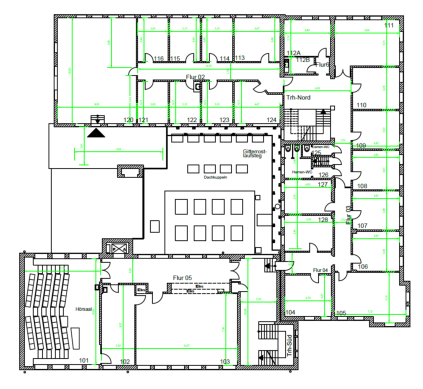

In [3]:
plt.imshow(image_batiment)
plt.axis('off')
plt.show()

## Avec l'ensemble de positions des signaux collectés en avance

### Visualisation des fichiers utilisés

`Fichier contenant les signaux reçus par l'usager`

In [4]:
import pandas as pd
df = pd.read_csv("./datas/without_acces/BSSID_user.csv", sep=";")
df

,BSSID,Signal
0,f4:ea:b5:dc:2a:55:,-71
1,f4:ea:b5:dc:15:16:,-61
2,f4:ea:b5:dc:2a:56:,-72
3,f4:ea:b5:dc:6d:96:,-71
4,f4:ea:b5:dc:12:16:,-71
5,f4:ea:b5:dc:10:d4:,-73
6,f4:ea:b5:dc:15:14:,-60
7,f4:ea:b5:dc:2a:54:,-72
8,f4:ea:b5:dc:6d:94:,-72
9,f4:ea:b5:dc:12:14:,-72


`Fichier contenant les signaux collectés et les positions où ils ont été prises`

* X : position en (x) où a été collecté le signal
* Y : position en (y) où a été collecté le signal

In [5]:
df = pd.read_csv("./datas/without_acces/BSSIDs_collected.csv", sep=";")
df

,BSSID,Signal,X,Y
0,84:90:0a:36:07:69:,-88.0,2.58,6.39
1,84:90:0a:36:07:69:,-88.0,2.68,6.46
2,84:90:0a:36:07:69:,-88.0,2.65,6.34
3,84:90:0a:36:07:69:,-88.0,2.71,6.40
4,f4:ea:b5:dc:10:d5:,-87.0,2.58,6.39
...,...,...,...,...
7587,f4:ea:b5:dc:13:55:,-46.0,3.27,1.56
7588,f4:ea:b5:dc:13:55:,-44.0,3.34,1.60
7589,f4:ea:b5:dc:13:55:,-44.0,3.30,1.47
7590,f4:ea:b5:dc:13:55:,-44.0,3.22,1.53


### Calcul de la position de l'usager par similarité de signaux

`Calcul de la position de l'usager depuis le fichier`

* Chargement du fichier des signaux de l'usager
* Chargement des signaux collectés avec les positions où ils ont été prises
* Calcul de la position proprement dite

In [6]:
from src.detect_user import detect_collected_sim
from src.load import load_collected_user, load_collected_positions_2d

In [7]:
E = load_collected_user("./datas/without_acces/BSSID_user.csv")
P, D = load_collected_positions_2d("./datas/without_acces/BSSIDs_collected.csv")
M = detect_collected_sim(E, P, D, k=3)

[Position détectée]  
 M (x : 2.6466666666666665, y : 6.376666666666667)


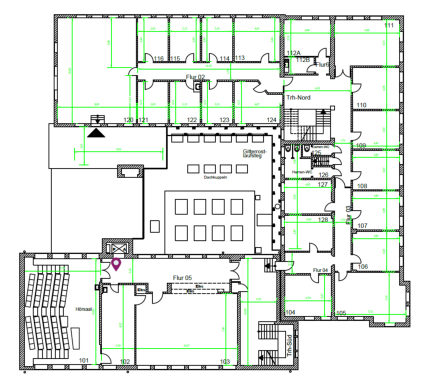

In [8]:
from src.plot import plot_position


if M is not None:
    print("[Position détectée]  ")
    print(f" M (x : {M[0]}, y : {M[1]})")
    
    image = plot_position(
        M,
        None,
        "./images/pointeur_violet.png",
        image=image_batiment,
        echelle=ECHELLE,
        showed=False
    )
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("[Aucune position détectée]  ")

### Calcul de la position de l'usager en calculant d'abord les points d'accès

##### `Calcul des positions des points d'accès`

* Chargement et segmentation des signaux collectés par points d'accès
* Calcul les positions des points d'accès

In [9]:
from src.load import load_to_compute_acces_points_2d
from src.detect_access_points import detect_collected_access
from src.save import save_acces_points_2d

In [10]:
C = load_to_compute_acces_points_2d("./datas/without_acces/BSSIDs_collected.csv")

In [11]:
access_points = detect_collected_access(C)

In [12]:
pacs = save_acces_points_2d(access_points, "./datas/without_acces/access_points_compute.csv")
pacs

,BSSID,X,Y
0,00:a0:57:18:66:79:,0.961552,0.971853
1,00:a0:57:2a:ba:60:,0.112902,0.345504
2,02:a0:57:18:66:79:,1.145805,0.902055
3,02:a0:57:2a:ba:60:,0.585865,1.057959
4,06:a0:57:18:66:79:,0.503234,0.631571
...,...,...,...
105,f4:ea:b5:dc:6d:94:,4.222790,17.758446
106,f4:ea:b5:dc:6d:95:,3.915443,18.092997
107,f4:ea:b5:dc:6d:96:,4.242042,17.483472
108,f4:ea:b5:dc:6d:a4:,1.301633,0.898734


In [13]:
pacs[["X", "Y"]]

,X,Y
0,0.961552,0.971853
1,0.112902,0.345504
2,1.145805,0.902055
3,0.585865,1.057959
4,0.503234,0.631571
...,...,...
105,4.222790,17.758446
106,3.915443,18.092997
107,4.242042,17.483472
108,1.301633,0.898734


##### `Calcul de la position de l'usager`

In [14]:
from src.detect_user import detect_collected_compute_access

In [15]:
M, _ = detect_collected_compute_access(E, access_points)

In [16]:
from src.plot import plot_access_user

[Position détectée]  
 M (x : 1.4378557847259223, y : 7.143897857559109)


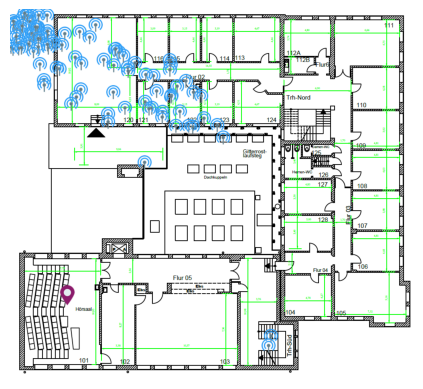

In [17]:
if M is not None:
    print("[Position détectée]  ")
    print(f" M (x : {M[0]}, y : {M[1]})")
    
    image = plot_access_user(
        access_points,
        M,
        None,
        "./images/signal.png",
        "./images/pointeur_violet.png",
        image=image_batiment,
        echelle=ECHELLE,
        showed=False
    )
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

else:
    print("[Aucune position détectée]  ")